In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\todds\anaconda3\envs\pythonadv\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CANDIDATE,0,0,0,0,0.259820,4.040000e-07,-4.040000e-07,131.850610,0.001370,...,-62,4.736,0.028,-0.035,0.526,0.035,-0.035,281.11646,43.282440,15.174
1,FALSE POSITIVE,0,1,0,0,0.299698,1.910000e-07,-1.910000e-07,132.017121,0.000528,...,-154,4.547,0.058,-0.071,0.782,0.090,-0.074,296.96381,50.745380,14.828
2,CANDIDATE,0,0,0,0,0.306702,7.190000e-07,-7.190000e-07,131.512160,0.002070,...,-184,4.512,0.095,-0.085,0.786,0.110,-0.099,289.82599,43.725231,15.229
3,FALSE POSITIVE,0,1,0,0,0.306938,3.330000e-07,-3.330000e-07,131.635518,0.000900,...,-138,4.580,0.044,-0.061,0.741,0.081,-0.066,287.73572,42.823421,14.409
4,FALSE POSITIVE,0,1,0,0,0.328687,4.620000e-07,-4.620000e-07,132.771460,0.001260,...,-160,4.535,0.048,-0.143,0.847,0.181,-0.077,288.41684,47.731091,15.316


# Select your features (columns)

In [6]:
# NEW:  Dropping "CANDIDATE" values from disposition column to try running date only on confirmed of false postives
drop_candidate = df[df['koi_disposition'] != "CANDIDATE"]
drop_candidate.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1,FALSE POSITIVE,0,1,0,0,0.299698,1.910000e-07,-1.910000e-07,132.017121,0.000528,...,-154,4.547,0.058,-0.071,0.782,0.090,-0.074,296.96381,50.745380,14.828
3,FALSE POSITIVE,0,1,0,0,0.306938,3.330000e-07,-3.330000e-07,131.635518,0.000900,...,-138,4.580,0.044,-0.061,0.741,0.081,-0.066,287.73572,42.823421,14.409
4,FALSE POSITIVE,0,1,0,0,0.328687,4.620000e-07,-4.620000e-07,132.771460,0.001260,...,-160,4.535,0.048,-0.143,0.847,0.181,-0.077,288.41684,47.731091,15.316
5,FALSE POSITIVE,0,1,0,0,0.339070,4.230000e-07,-4.230000e-07,131.869570,0.001050,...,-152,3.846,0.560,-0.140,2.183,0.496,-1.158,296.70190,42.508652,12.771
6,CONFIRMED,0,0,0,0,0.341842,2.280000e-07,-2.280000e-07,131.660336,0.000545,...,-136,4.601,0.030,-0.070,0.747,0.086,-0.058,285.41061,44.412209,14.915


In [7]:
# Further clean above by dropping error measurement columns
drop_columns = ['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
                'koi_impact_err1', 'koi_impact_err2', 'koi_steff_err1', 'koi_steff_err2', 
                'koi_duration_err1', 'koi_duration_err2', 'koi_slogg_err1', 'koi_slogg_err2', 
                'koi_srad_err1', 'koi_srad_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 
                'koi_prad_err2', 'koi_insol_err1', 'koi_insol_err2']

# Check resulting table
clean_df = drop_candidate.drop(drop_columns, axis=1)
clean_df.head(2)


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
1,FALSE POSITIVE,0,1,0,0,0.299698,132.017121,0.964,0.8473,346.9,...,2246,6005.79,53.6,1,5180,4.547,0.782,296.96381,50.745380,14.828
3,FALSE POSITIVE,0,1,0,0,0.306938,131.635518,0.005,0.5925,119.2,...,2142,5019.53,29.3,1,5088,4.580,0.741,287.73572,42.823421,14.409


In [38]:
# Assign X (data) and y (target); starting with full dataset

X = clean_df.drop('koi_disposition', axis=1)
y = clean_df['koi_disposition']


# Binary code y-data using pd.get_dummies
y = pd.get_dummies(y)

# Confirm data shapes
print(X.shape, y.shape)

y.head()

(5304, 20) (5304, 2)


,CONFIRMED,FALSE POSITIVE
1,0,1
3,0,1
4,0,1
5,0,1
6,1,0


# Create a Train Test Split

In [9]:
# Import KNN modules for KNN testing

from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Split data into training and testing models

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [12]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



k: 1, Train/Test Score: 1.000/0.983
k: 3, Train/Test Score: 0.990/0.983
k: 5, Train/Test Score: 0.989/0.985
k: 7, Train/Test Score: 0.989/0.985
k: 9, Train/Test Score: 0.989/0.984
k: 11, Train/Test Score: 0.988/0.984
k: 13, Train/Test Score: 0.988/0.984
k: 15, Train/Test Score: 0.988/0.984
k: 17, Train/Test Score: 0.987/0.983
k: 19, Train/Test Score: 0.987/0.985


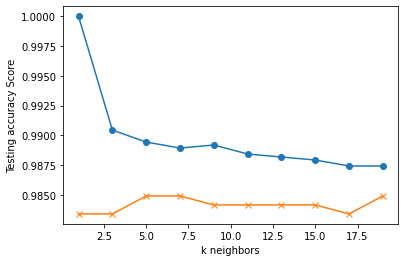

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# k=7 appears to be the best classifier; also try k=17 for comparison purposes
n_neighbors=7
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_scaled, y_train)
print(f'k={n_neighbors} Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.985


# Use Compare Predicted Results Against Actual


    

In [47]:
# Check predidcted against actual values

predicted_class = knn.predict(X_test)
print(f"First 10 Predictions:   {predicted_class[:10]}")
print(f"First 10 Actual labels: {y_test[:10]}")

First 10 Predictions:   [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
First 10 Actual labels:       CONFIRMED  FALSE POSITIVE
5361          1               0
973           0               1
6784          0               1
5913          1               0
6494          0               1
6720          0               1
3752          1               0
6191          0               1
351           0               1
36            0               1


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)